In [46]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from nltk import word_tokenize

In [2]:
%%bash 
head training8b.json

{
   "questions": [
      {
         "body": "Is Hirschsprung disease a mendelian or a multifactorial disorder?",
         "documents": [
            "http://www.ncbi.nlm.nih.gov/pubmed/15858239",
            "http://www.ncbi.nlm.nih.gov/pubmed/15829955",
            "http://www.ncbi.nlm.nih.gov/pubmed/20598273",
            "http://www.ncbi.nlm.nih.gov/pubmed/6650562",
            "http://www.ncbi.nlm.nih.gov/pubmed/12239580",


In [3]:
df = pd.read_json('training8b.json') 
print(df)

                                              questions
0     {'body': 'Is Hirschsprung disease a mendelian ...
1     {'body': 'List signaling molecules (ligands) t...
2     {'body': 'Is the protein Papilin secreted?', '...
3     {'body': 'Are long non coding RNAs spliced?', ...
4     {'body': 'Is RANKL secreted from the cells?', ...
...                                                 ...
3238  {'body': 'List 3 indications for rituximab.', ...
3239  {'body': 'Is the crystal structure of Pim-1 av...
3240  {'body': 'Do tumour-associated macrophages hav...
3241  {'body': 'Is TNF-α an activator of pancreatic ...
3242  {'body': 'Can mitochondria transfer from cell ...

[3243 rows x 1 columns]


In [4]:
with open('training8b.json') as f: 
    d = json.load(f) 
    
#parent node is "questions"
df = pd.json_normalize(d['questions']) 
df.head(10)

,body,documents,ideal_answer,concepts,type,id,snippets,triples,exact_answer
0,Is Hirschsprung disease a mendelian or a multi...,"[http://www.ncbi.nlm.nih.gov/pubmed/15858239, ...","[Coding sequence mutations in RET, GDNF, EDNRB...",[http://www.disease-ontology.org/api/metadata/...,summary,55031181e9bde69634000014,"[{'offsetInBeginSection': 131, 'offsetInEndSec...",NaN,NaN
1,List signaling molecules (ligands) that intera...,"[http://www.ncbi.nlm.nih.gov/pubmed/23959273, ...",[The 7 known EGFR ligands are: epidermal grow...,[http://amigo.geneontology.org/cgi-bin/amigo/t...,list,55046d5ff8aee20f27000007,"[{'offsetInBeginSection': 1085, 'offsetInEndSe...",[{'p': 'http://purl.uniprot.org/core/encodedBy...,"[[epidermal growth factor], [betacellulin], [e..."
2,Is the protein Papilin secreted?,"[http://www.ncbi.nlm.nih.gov/pubmed/3320045, h...","[Yes, papilin is a secreted protein]",NaN,yesno,54e25eaaae9738404b000017,"[{'offsetInBeginSection': 1085, 'offsetInEndSe...",NaN,yes
3,Are long non coding RNAs spliced?,"[http://www.ncbi.nlm.nih.gov/pubmed/22955988, ...",[Long non coding RNAs appear to be spliced thr...,[http://www.nlm.nih.gov/cgi/mesh/2014/MB_cgi?f...,yesno,535d292a9a4572de6f000003,"[{'offsetInBeginSection': 546, 'offsetInEndSec...",NaN,yes
4,Is RANKL secreted from the cells?,"[http://www.ncbi.nlm.nih.gov/pubmed/22948539, ...",[Receptor activator of nuclear factor κB ligan...,"[http://www.uniprot.org/uniprot/TNF11_RAT, htt...",yesno,55262a9787ecba3764000009,"[{'offsetInBeginSection': 114, 'offsetInEndSec...",NaN,yes
5,Does metformin interfere thyroxine absorption?,[http://www.ncbi.nlm.nih.gov/pubmed/26191653],[No. There are not reported data indicating th...,[http://www.nlm.nih.gov/cgi/mesh/2012/MB_cgi?f...,yesno,51406e6223fec90375000009,"[{'offsetInBeginSection': 1418, 'offsetInEndSe...",NaN,no
6,Which miRNAs could be used as potential biomar...,"[http://www.ncbi.nlm.nih.gov/pubmed/21345725, ...","[miR-200a, miR-100, miR-141, miR-200b, miR-200...",[http://www.nlm.nih.gov/cgi/mesh/2015/MB_cgi?f...,list,553fa78b1d53b76422000007,"[{'offsetInBeginSection': 1010, 'offsetInEndSe...",NaN,"[[let-7a], [let-7b], [let-7i], [miR-21], [miR-..."
7,Which acetylcholinesterase inhibitors are used...,"[http://www.ncbi.nlm.nih.gov/pubmed/21815707, ...",[Pyridostigmine and neostygmine are acetylchol...,[http://www.nlm.nih.gov/cgi/mesh/2012/MB_cgi?f...,list,5149199dd24251bc05000040,"[{'offsetInBeginSection': 1251, 'offsetInEndSe...",NaN,"[[neostigmine], [pyridostigmine]]"
8,Has Denosumab (Prolia) been approved by FDA?,"[http://www.ncbi.nlm.nih.gov/pubmed/24126422, ...","[Yes, Denosumab was approved by the FDA in 2010.]",[http://www.biosemantics.org/jochem#4268082],yesno,52bf1db603868f1b06000011,"[{'offsetInBeginSection': 12, 'offsetInEndSect...",[{'p': 'http://www.w3.org/2004/02/skos/core#no...,yes
9,List the human genes encoding for the dishevel...,"[http://www.ncbi.nlm.nih.gov/pubmed/12883684, ...",[DVL-1\nDVL-2\nDVL-3],NaN,list,5709e4b2cf1c32585100001c,"[{'offsetInBeginSection': 294, 'offsetInEndSec...",NaN,"[[DVL-1], [DVL-2], [DVL-3]]"


In [5]:
df1 = pd.DataFrame(df['ideal_answer'].to_list())
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,"Coding sequence mutations in RET, GDNF, EDNRB,...",None,None,None,None,None,None,None,None,None,None,None
1,The 7 known EGFR ligands are: epidermal growt...,None,None,None,None,None,None,None,None,None,None,None
2,"Yes, papilin is a secreted protein",None,None,None,None,None,None,None,None,None,None,None
3,Long non coding RNAs appear to be spliced thro...,None,None,None,None,None,None,None,None,None,None,None
4,Receptor activator of nuclear factor κB ligand...,None,None,None,None,None,None,None,None,None,None,None
5,No. There are not reported data indicating tha...,None,None,None,None,None,None,None,None,None,None,None
6,"miR-200a, miR-100, miR-141, miR-200b, miR-200c...",None,None,None,None,None,None,None,None,None,None,None
7,Pyridostigmine and neostygmine are acetylcholi...,None,None,None,None,None,None,None,None,None,None,None
8,"Yes, Denosumab was approved by the FDA in 2010.",None,None,None,None,None,None,None,None,None,None,None
9,DVL-1\nDVL-2\nDVL-3,None,None,None,None,None,None,None,None,None,None,None


In [6]:
df2 = pd.DataFrame(df['exact_answer'].to_list())
df2.head(10)

,0
0,NaN
1,"[[epidermal growth factor], [betacellulin], [e..."
2,yes
3,yes
4,yes
5,no
6,"[[let-7a], [let-7b], [let-7i], [miR-21], [miR-..."
7,"[[neostigmine], [pyridostigmine]]"
8,yes
9,"[[DVL-1], [DVL-2], [DVL-3]]"


In [7]:
df['type'].unique()

array(['summary', 'list', 'yesno', 'factoid'], dtype=object)

### EDA

In [8]:
df.isnull().sum()

body               0
documents          0
ideal_answer       0
concepts        1389
type               0
id                 0
snippets           0
triples         2921
exact_answer     777
dtype: int64

In [9]:
df.describe()

,body,documents,ideal_answer,concepts,type,id,snippets,triples,exact_answer
count,3243,3243,3243,1854,3243,3243,3243,322,2466
unique,3243,3222,3229,1802,4,3243,3241,317,1562
top,List types of avoided words in bacterial genomes,[http://www.ncbi.nlm.nih.gov/pubmed/28471166],[Yes],[http://www.nlm.nih.gov/cgi/mesh/2015/MB_cgi?f...,factoid,532ff917d6d3ac6a34000038,"[{'offsetInBeginSection': 12, 'offsetInEndSect...",[{'p': 'http://data.linkedct.org/resource/link...,yes
freq,1,2,9,7,941,1,2,2,704


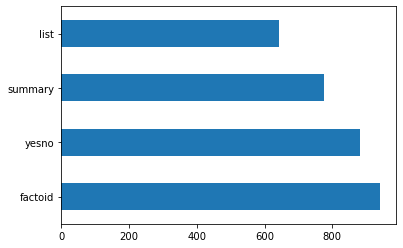

In [10]:
df.type.value_counts().plot.barh()
plt.show()

In [11]:
df.type.value_counts(normalize=True)

factoid    0.290163
yesno      0.271662
summary    0.239593
list       0.198582
Name: type, dtype: float64

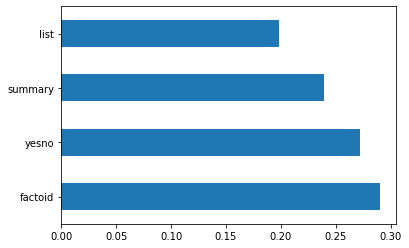

In [12]:
df.type.value_counts(normalize=True).plot.barh()
plt.show()

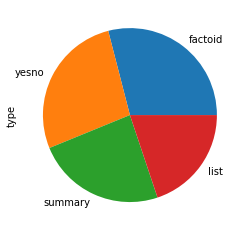

In [13]:
df.type.value_counts(normalize=True).plot.pie()
plt.show()

In [14]:
df.type.describe()

count        3243
unique          4
top       factoid
freq          941
Name: type, dtype: object

In [22]:
answers = []
for index, row in df.iterrows():
    answerList = row['ideal_answer']
    listToStr = ' '.join([str(elem) for elem in answerList]) 
    answers.append(listToStr)
df = df.assign(answers=answers)

In [23]:
df['answers']

0       Coding sequence mutations in RET, GDNF, EDNRB,...
1       The 7 known EGFR ligands  are: epidermal growt...
2                     Yes,  papilin is a secreted protein
3       Long non coding RNAs appear to be spliced thro...
4       Receptor activator of nuclear factor κB ligand...
                              ...                        
3238    Rituximab  is used to treat rheumatoid arthrit...
3239    Yes,\nThe crystal structures of Pim1 in apo fo...
3240    M2-like TAMs hold an unfavourable prognostic v...
3241    Yes,\nTNF-α  is the prime factor responsible f...
3242    Yes,\nthe recently discovered phenomenon of mi...
Name: answers, Length: 3243, dtype: object

In [28]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['ans_polarity']= df['answers'].apply(pol)
df['ans_subjectivity']= df['answers'].apply(sub)

df[['answers', 'type', 'ans_polarity', 'ans_subjectivity']].head(10)

,answers,type,ans_polarity,ans_subjectivity
0,"Coding sequence mutations in RET, GDNF, EDNRB,...",summary,-0.100,0.266667
1,The 7 known EGFR ligands are: epidermal growt...,list,0.000,0.000000
2,"Yes, papilin is a secreted protein",yesno,0.000,0.000000
3,Long non coding RNAs appear to be spliced thro...,yesno,-0.025,0.262500
4,Receptor activator of nuclear factor κB ligand...,yesno,0.000,0.000000
5,No. There are not reported data indicating tha...,yesno,0.000,0.000000
6,"miR-200a, miR-100, miR-141, miR-200b, miR-200c...",list,0.000,1.000000
7,Pyridostigmine and neostygmine are acetylcholi...,list,0.200,0.450000
8,"Yes, Denosumab was approved by the FDA in 2010.",yesno,0.000,0.000000
9,DVL-1\nDVL-2\nDVL-3,list,0.000,0.000000


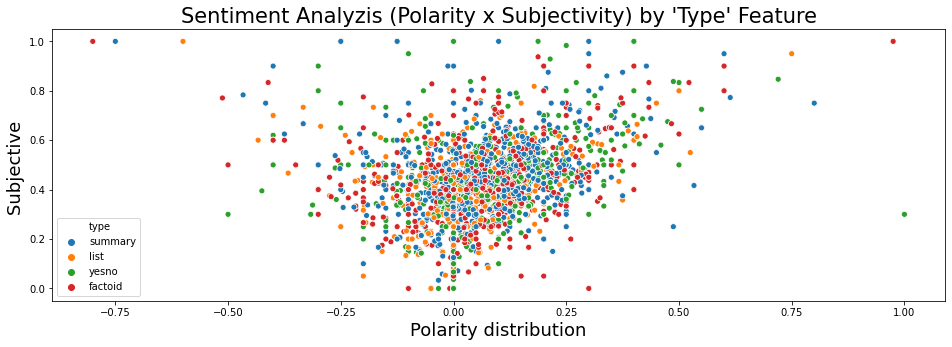

In [29]:
plt.figure(figsize=(16,5))

g = sns.scatterplot(x='ans_polarity', y='ans_subjectivity', 
                    data=df, hue='type')
g.set_title("Sentiment Analyzis (Polarity x Subjectivity) by 'Type' Feature", fontsize=21)
g.set_xlabel("Polarity distribution",fontsize=18)
g.set_ylabel("Subjective ",fontsize=18)

plt.show()

In [30]:
polarity_answers = df.groupby('type')['ans_polarity', 'ans_subjectivity'].describe().reset_index()

polarity_answers

C:\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


type ans_polarity                                                       \
                  count      mean       std   min  25%   50%       75%   max   
0  factoid        941.0  0.046165  0.158576 -0.80  0.0  0.00  0.100000  1.00   
1     list        644.0  0.030253  0.143972 -0.60  0.0  0.00  0.080417  0.75   
2  summary        777.0  0.064451  0.153020 -0.75  0.0  0.04  0.143750  0.80   
3    yesno        881.0  0.065518  0.171166 -0.50  0.0  0.00  0.130000  1.00   

  ans_subjectivity                                                         
             count      mean       std  min  25%       50%       75%  max  
0            941.0  0.290198  0.261325  0.0  0.0  0.300000  0.485417  1.0  
1            644.0  0.296942  0.246321  0.0  0.0  0.337857  0.485065  1.0  
2            777.0  0.397654  0.222427  0.0  0.3  0.416667  0.511111  1.0  
3            881.0  0.318988  0.273971  0.0  0.0  0.347222  0.500000  1.0

In [42]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [63]:
import itertools

bodyList = []
for index, row in df.iterrows():
    answerList = row['body']
    answerList = answerList.split(" ")
    bodyList.append(answerList)
bodyList = list(itertools.chain.from_iterable(bodyList))

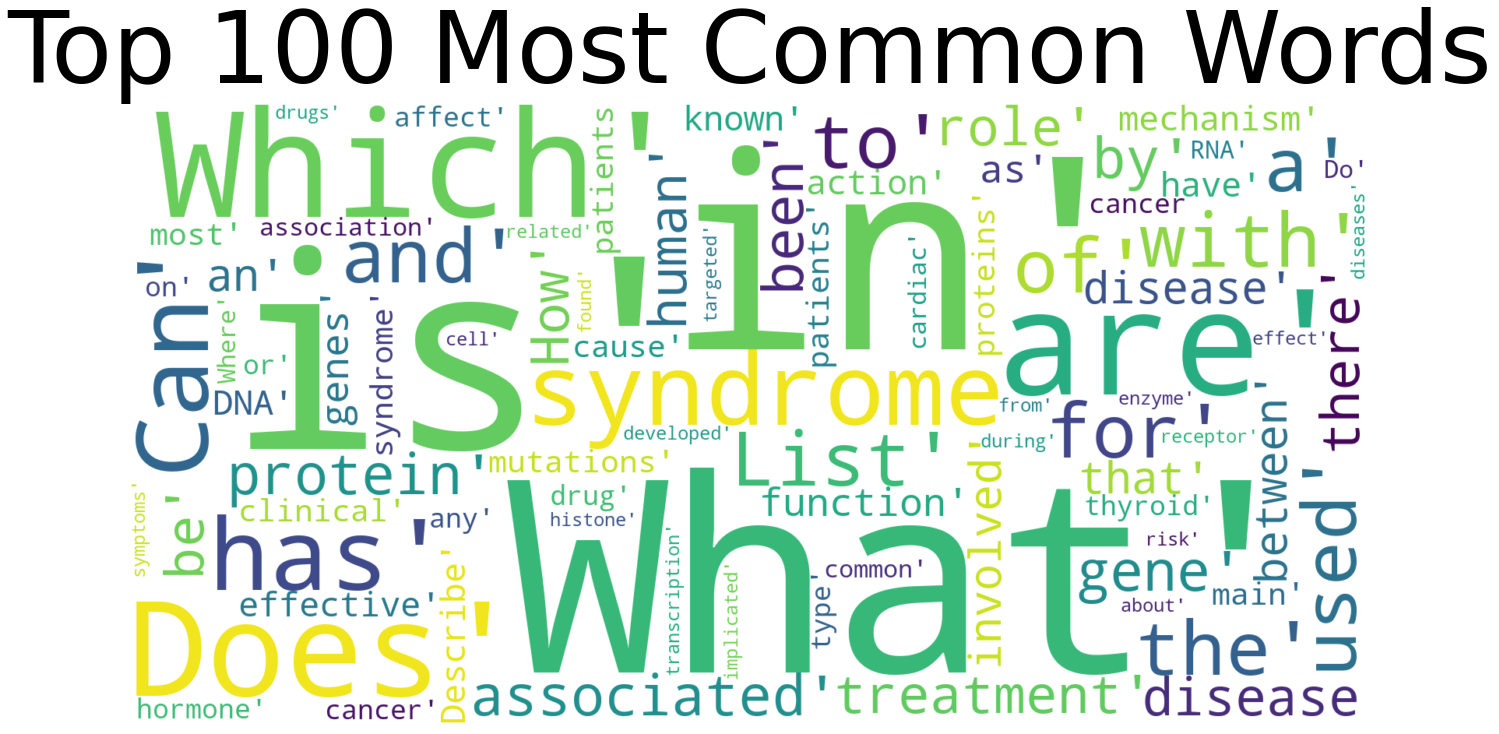

In [64]:
mostcommon = FreqDist(bodyList).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

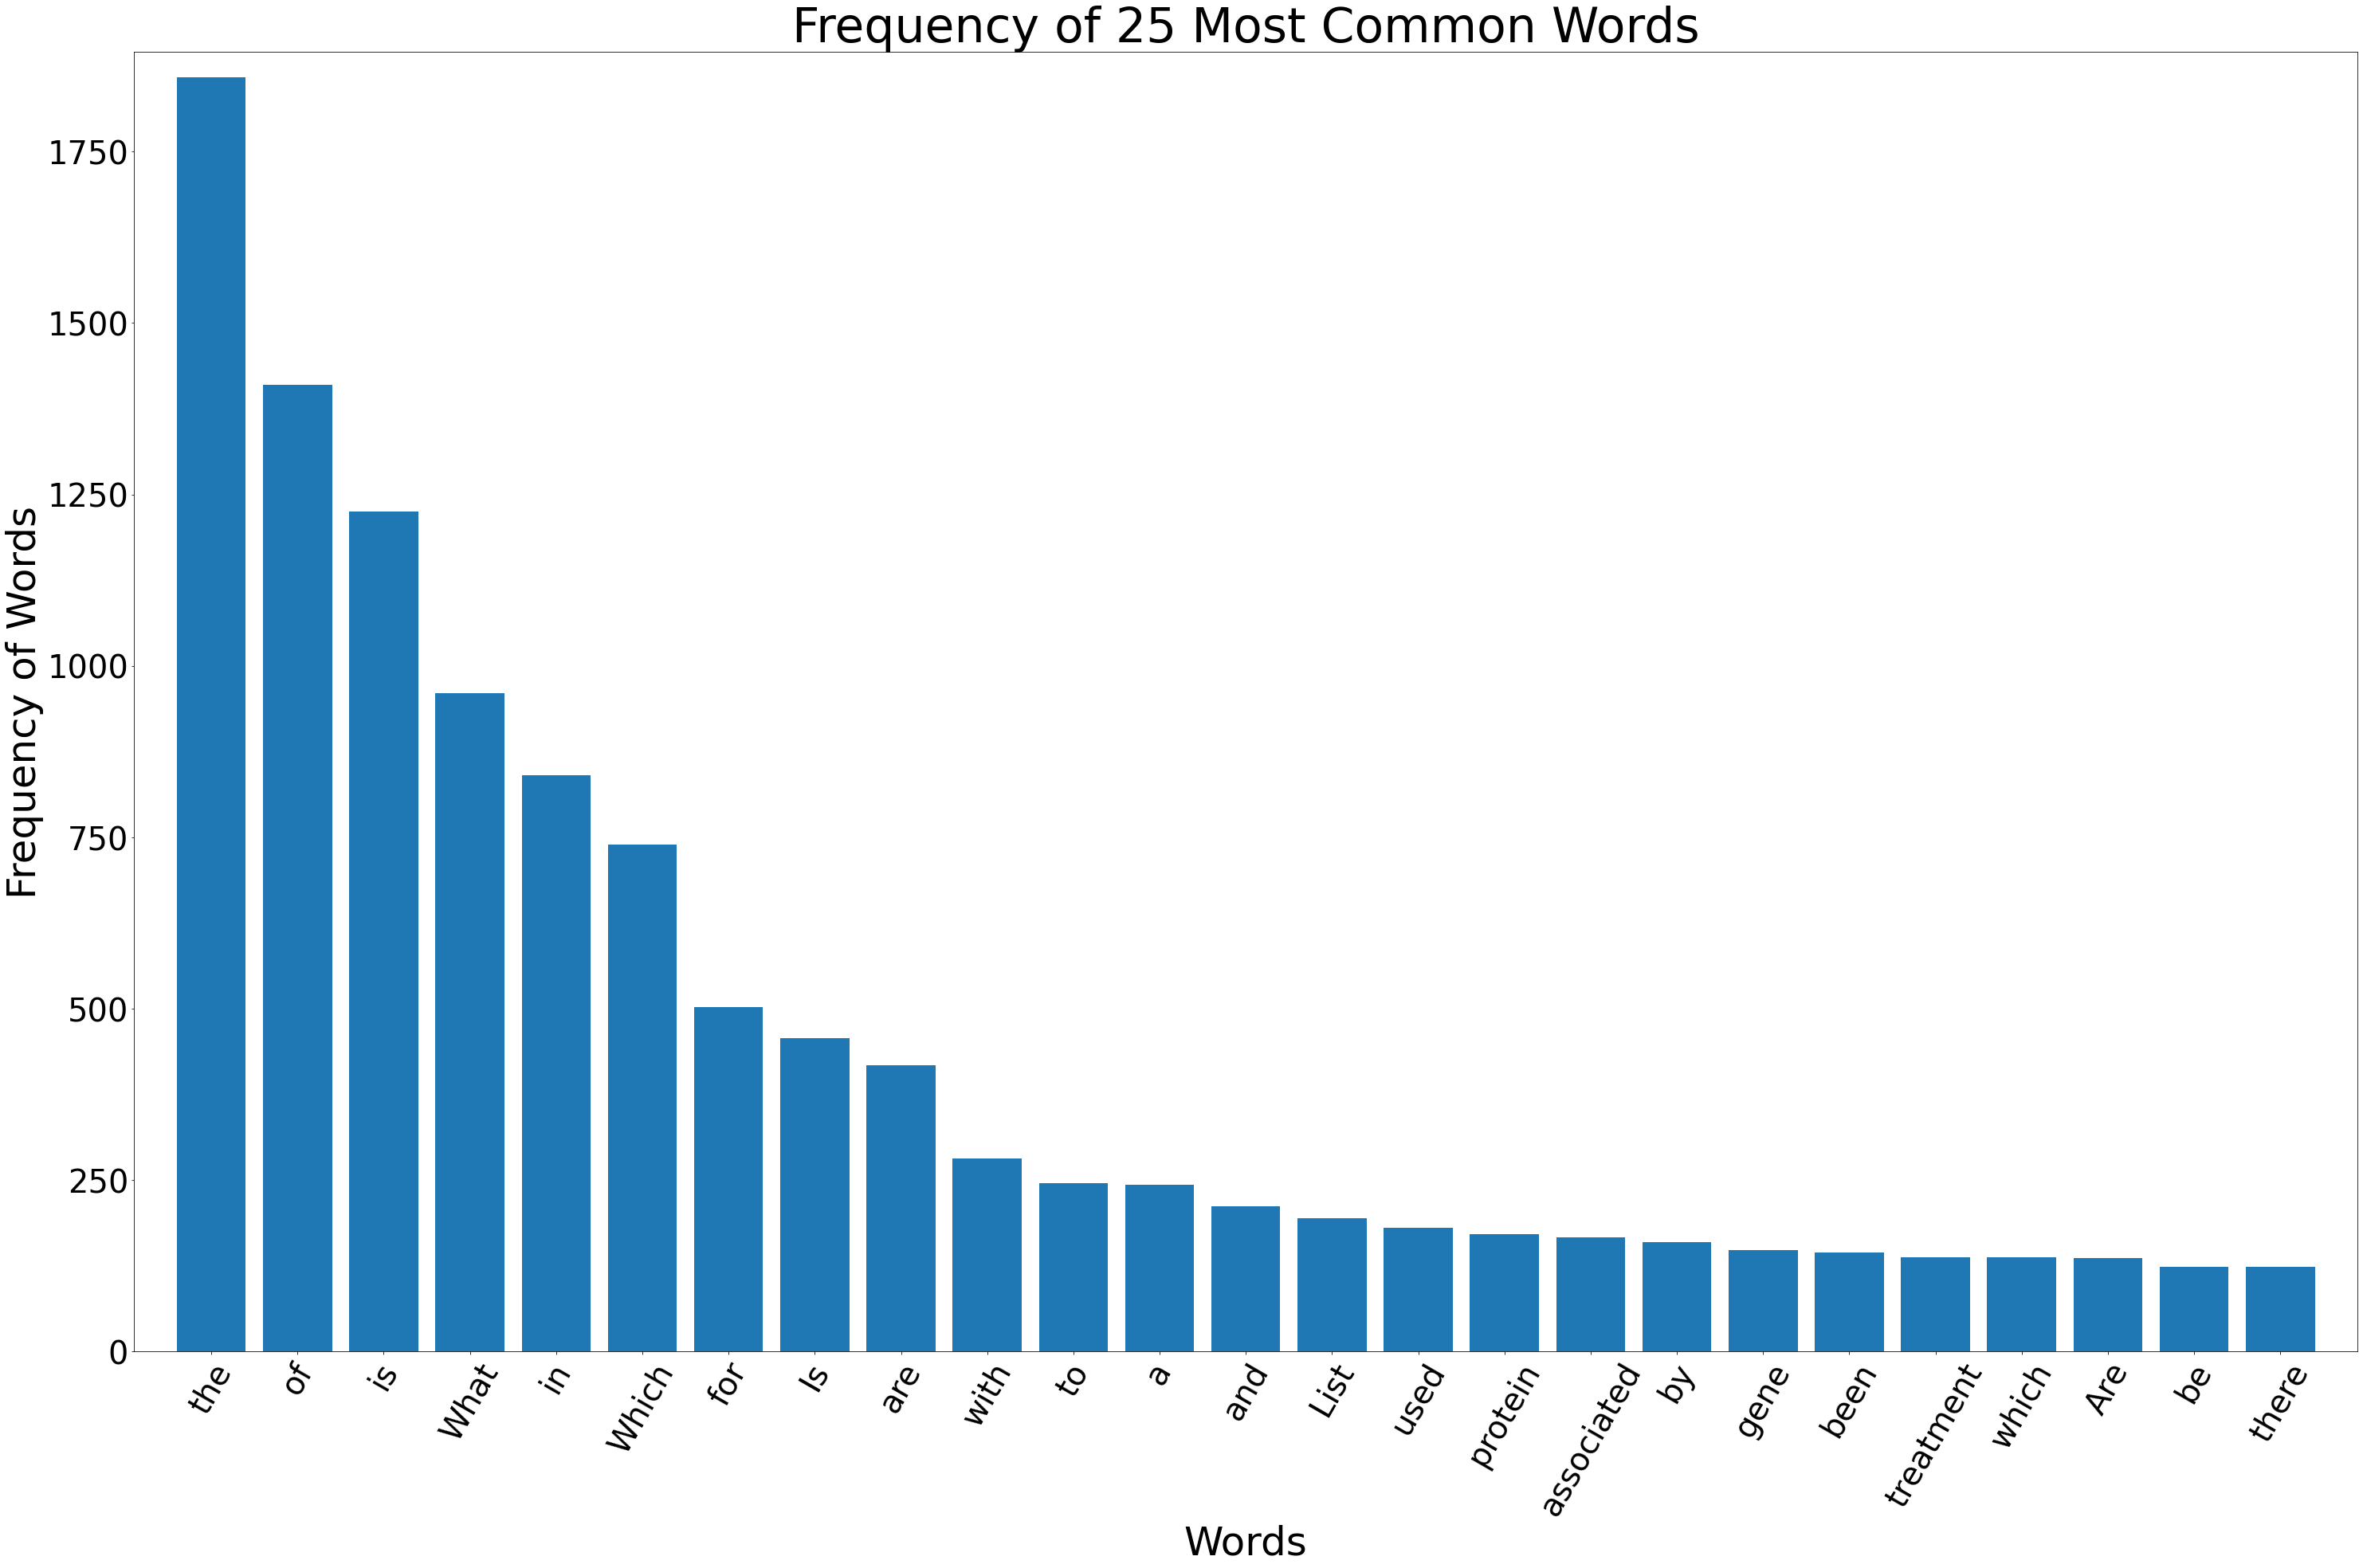

In [65]:
mostcommon_small = FreqDist(bodyList).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

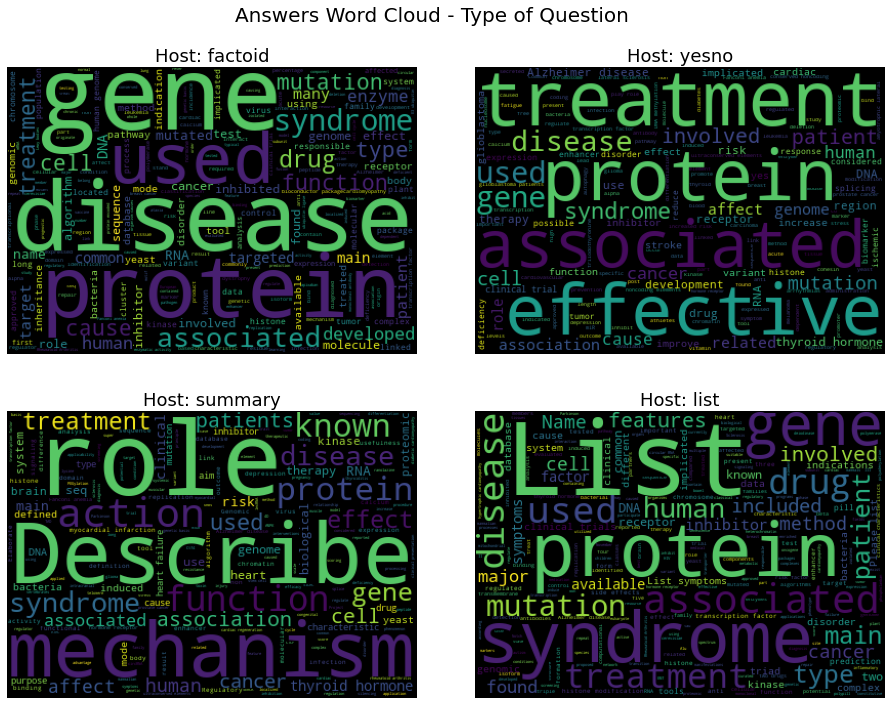

In [44]:
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(5, 2)

plt.figure(figsize=(16,7*4))

plt.suptitle('Answers Word Cloud - Type of Question', size=20)

for n, col in enumerate(df['type'].value_counts().index):
    ax = plt.subplot(grid[n])   
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=250,
        max_font_size=100, 
        width=400, height=280,
        random_state=42,
    ).generate(" ".join(df[df['type'] == col]['body'].astype(str)))

    #print(wordcloud)

    plt.imshow(wordcloud)
    plt.title(f"Host: {col}",fontsize=18)
    plt.axis('off')
    
plt.subplots_adjust(top = 0.95, hspace=.2, wspace=.1 )

plt.show()


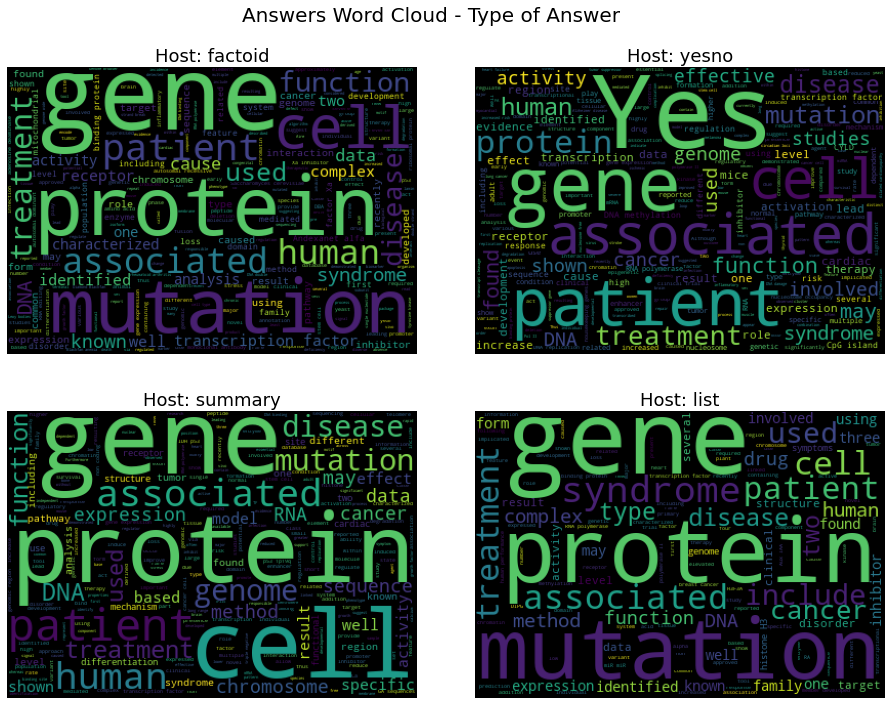

In [47]:
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(5, 2)

plt.figure(figsize=(16,7*4))

plt.suptitle('Answers Word Cloud - Type of Answer', size=20)

for n, col in enumerate(df['type'].value_counts().index):
    ax = plt.subplot(grid[n])   
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=250,
        max_font_size=100, 
        width=400, height=280,
        random_state=42,
    ).generate(" ".join(df[df['type'] == col]['answers'].astype(str)))

    #print(wordcloud)

    plt.imshow(wordcloud)
    plt.title(f"Host: {col}",fontsize=18)
    plt.axis('off')
    
plt.subplots_adjust(top = 0.95, hspace=.2, wspace=.1 )

plt.show()


In [49]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(question) for question in df.body]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the length
df['question_n_words'] = len_tokens

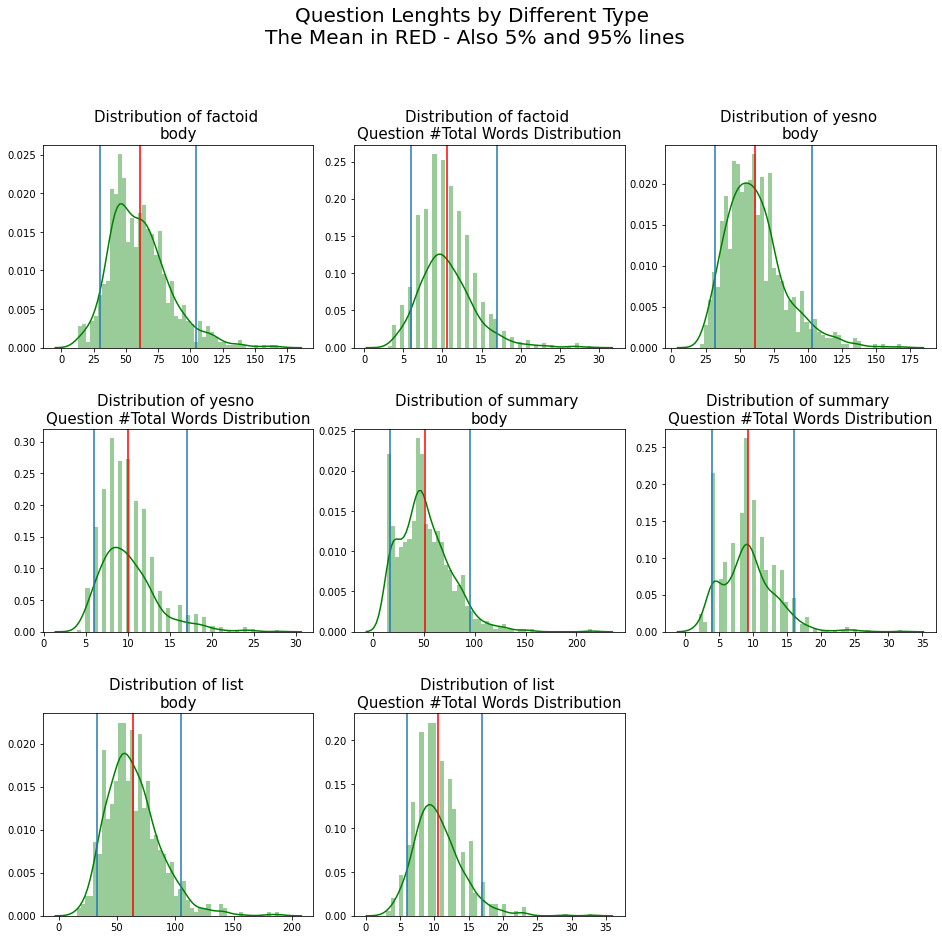

In [54]:
grid = gridspec.GridSpec(5, 3)
plt.figure(figsize=(16,6*4))

plt.suptitle('Question Lenghts by Different Type \nThe Mean in RED - Also 5% and 95% lines', size=20)
count=0
top_cats=df['type'].value_counts().index
for n, col in enumerate(top_cats):
    for i, q_t in enumerate(['body', 'question_n_words']):
        ax = plt.subplot(grid[count])
        if q_t == 'question_n_words':
            sns.distplot(df[df['type'] == col][q_t], bins = 50, 
                         color='g', label="RED - 50%") 
            ax.set_title(f"Distribution of {str(col)} \nQuestion #Total Words Distribution", fontsize=15)
            ax.axvline(df[df['type'] == col][q_t].quantile(.95))
            ax.axvline(df[df['type'] == col][q_t].quantile(.05))
            mean_val = df[df['type'] == col][q_t].mean()
            ax.axvline(mean_val, color='red' )
            ax.set_xlabel('')            
        else:
            sns.distplot(df[df['type'] == col][q_t].str.len(), bins = 50, 
                         color='g', label="RED - 50%") 
            ax.set_title(f"Distribution of {str(col)} \n{str(q_t)}", fontsize=15)
            ax.axvline(df[df['type'] == col][q_t].str.len().quantile(.95))
            ax.axvline(df[df['type'] == col][q_t].str.len().quantile(.05))
            mean_val = df[df['type'] == col][q_t].str.len().mean()
            ax.axvline(mean_val, color='red' )
            #ax.text(x=mean_val*1.1, y=.02, s='Holiday in US', alpha=0.7, color='#334f8d')
            ax.set_xlabel('')
        count+=1
        
plt.subplots_adjust(top = 0.90, hspace=.4, wspace=.15)
plt.show()